# 108. Introduction to Feature Engineering and Data Preparation

# 109. Dealing with Outliers

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [40]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)

    return sample_ages

In [41]:
sample = create_ages()

In [42]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

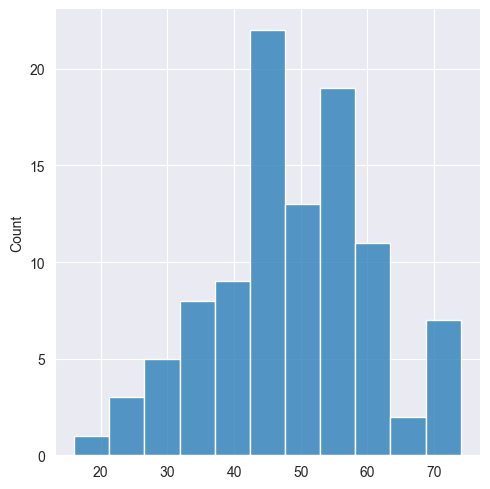

In [43]:
sns.displot(sample)

<Axes: >

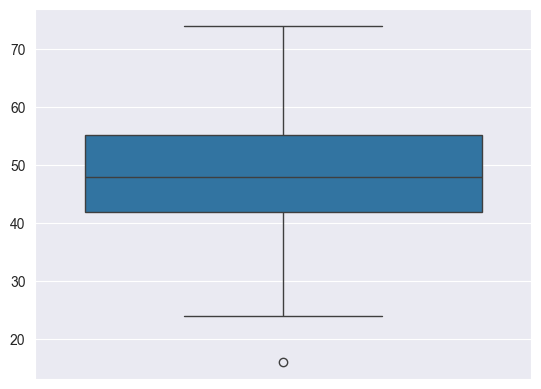

In [44]:
sns.boxplot(sample)

In [45]:
ser = pd.Series(sample)

In [46]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

The code you're running is part of a process called the IQR method for detecting outliers in your data. IQR stands for Interquartile Range.
The Interquartile Range (IQR) is a measure of statistical dispersion and is calculated as the difference between the upper (75%) and lower (25%) quartiles in your data. In your case, IQR = 55.25 - 42.0 suggests that you are subtracting the value of the lower quartile (42.0) from the upper quartile (55.25).
lower_limit = 1.5*(IQR) is part of the calculations for finding the 'whiskers' in a box-and-whiskers plot (or a similar visualization), which are used to highlight the potential outliers in the dataset.
If a data point is below Q1 - 1.5IQR or above Q3 + 1.5IQR, it is viewed as being too far from the central values to be reasonable, thus it's considered an outlier. Your specific line is calculating the lower bound (below which a data point would be considered an outlier).
So in this context, you are preparing to detect or filter outliers using the IQR method.

In [47]:
IQR = 55.25 - 42.0
lower_limit = 1.5 * IQR

In [48]:
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

This set of instructions is also performing outlier detection using the Interquartile Range (IQR) method, similar to the previous script you mentioned, only this time in a more comprehensive way. Here is the outline for each line:
q75, q25 = np.percentile(sample, [75, 25]): This line calculates the 75th percentile (upper quartile, q75) and the 25th percentile (lower quartile, q25) of your sample data. In other words, it's calculating the values below which lie 75% and 25% of data points respectively.
iqp = q75 - q25: This line is calculating the Interquartile Range (IQR) which is the range within which the middle 50% of your data falls in. It's calculated as the difference between the 75th and 25th percentiles.
q25 - 1.5 * iqp: As before, this expression finds the lower limit for outliers. Any data point that falls below this computed value is a potential outlier, as per the IQR method.
So basically, in plain English, this script calculates the range in which the bulk of your data should lie, and provides a measure below which data may be considered suspiciously low (potential lower outliers).

In [49]:
q75, q25 = np.percentile(sample, [75, 25])
iqp = q75 - q25

In [50]:
q25 - 1.5 * iqp

22.125

In [51]:
data_path = Path('..') / 'DATA' / 'Ames_Housing_Data.csv'

df = pd.read_csv(data_path)

In [52]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [53]:
df_int = df.select_dtypes(include=['int'])

In [54]:
df_int.corr()['SalePrice'].sort_values(ascending=True)

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Yr Sold           -0.030569
Misc Val          -0.015691
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Lot Area           0.266549
2nd Flr SF         0.269373
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Gr Liv Area        0.706780
Overall Qual       0.799262
SalePrice          1.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

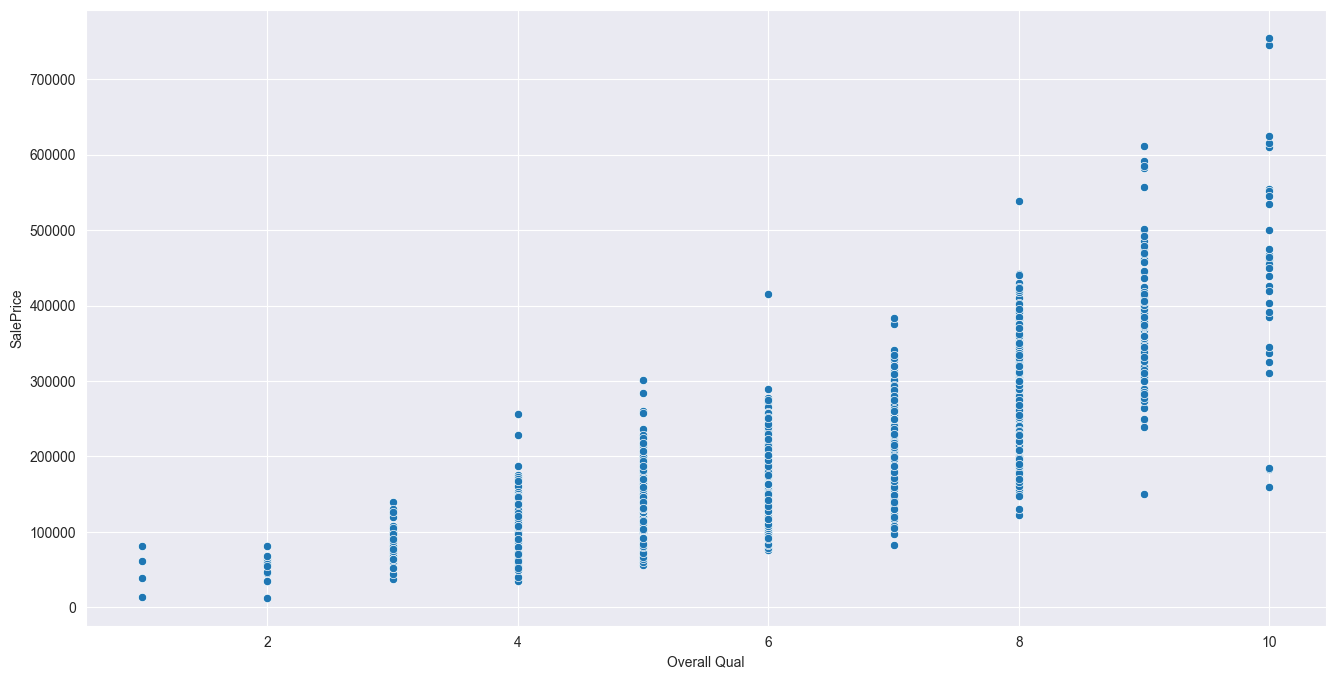

In [55]:
plt.figure(figsize=[16, 8])
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

In [56]:
import plotly.express as px

fig = px.scatter(df, x="Overall Qual", y="SalePrice")

fig.update_layout(
    autosize=False,
    width=800,
    height=500
)

fig.show()

fig_1 = px.scatter(df, x="Gr Liv Area", y="SalePrice")

fig_1.update_layout(
    autosize=False,
    width=800,
    height=500
)

fig_1.show()

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

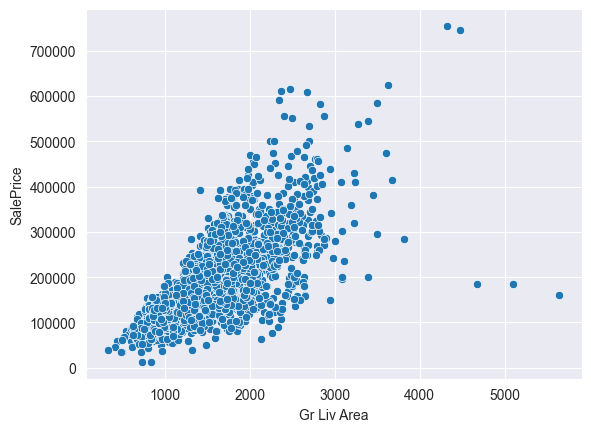

In [57]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [58]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [59]:
# Removing Outliers
drop_index = df[(df['Gr Liv Area'] > 4_000) & (df['SalePrice'] < 400_000)].index
df[(df['Gr Liv Area'] > 4_000) & (df['SalePrice'] < 400_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [60]:
df = df.drop(drop_index, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

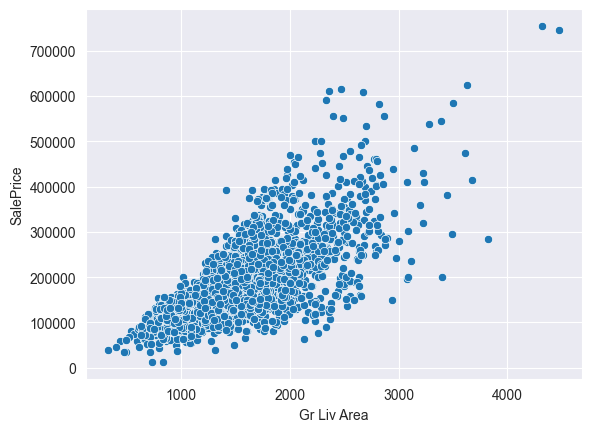

In [61]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [62]:
df_path = Path('..') / 'DATA' / 'Ames_outliers_removed.csv'

df = pd.read_csv(df_path)

# 110. Dealing with Missing Data : Part One - Evaluation of Missing Data

In [63]:
with open(Path('..') / 'DATA' / 'Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [64]:
df_path = Path('..') / 'DATA' / 'Ames_outliers_removed.csv'

df = pd.read_csv(df_path)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [66]:
df = df.drop('PID', axis=1)

In [67]:
len(df.columns)

80

In [68]:
df.isnull().sum()
df.isnull().sum() > 0

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 80, dtype: bool

In [69]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [70]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [71]:
percent_nan = percent_missing(df)

In [72]:
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

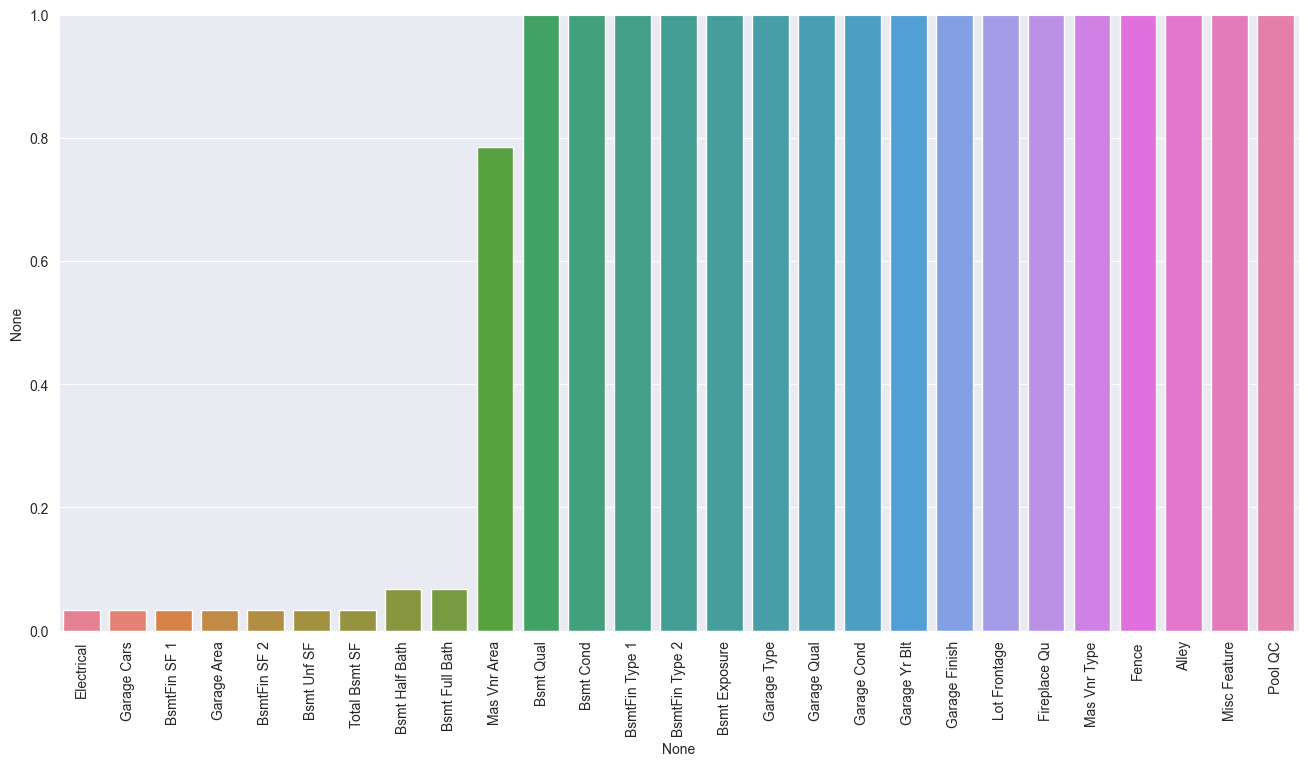

In [73]:
plt.figure(figsize=[16, 8])

sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan.index, legend=False)
plt.xticks(rotation=90)
plt.ylim(0, 1)

# To remove the legend that is now unnecessary
plt.legend([],[], frameon=False)

# 111. Dealing with Missing Data : Part Two - Filling or Dropping data based on Rows

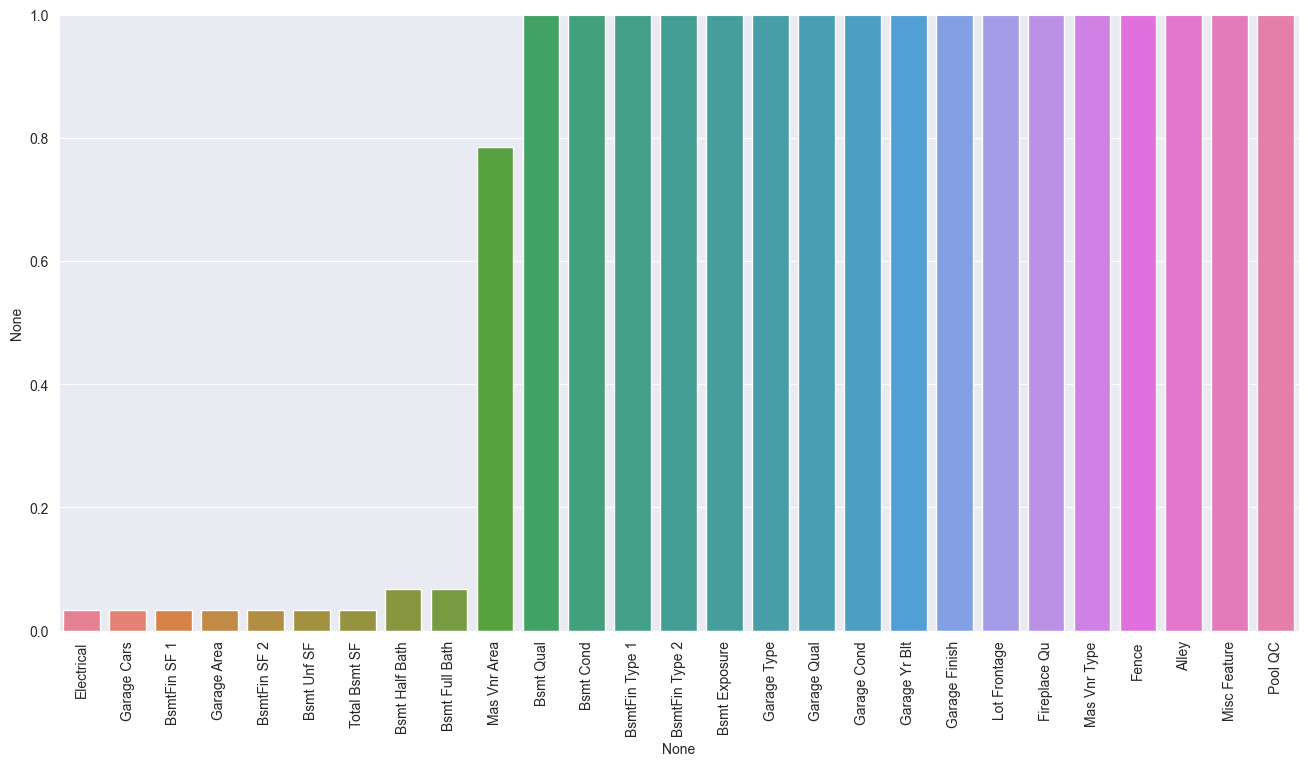

In [74]:
plt.figure(figsize=[16, 8])

sns.barplot(x=percent_nan.index, y=percent_nan, hue=percent_nan.index, legend=False)
plt.xticks(rotation=90)
plt.ylim(0, 1)

# To remove the legend that is now unnecessary
plt.legend([],[], frameon=False)

In [75]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [76]:
100/len(df)

0.0341646737273659

In [96]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [97]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [98]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

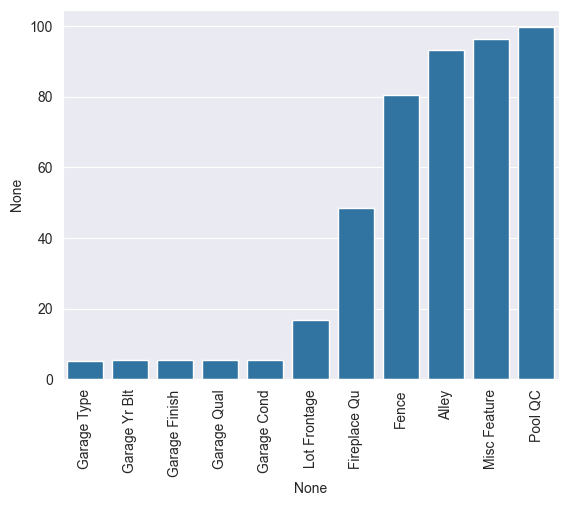

In [101]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [99]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [100]:
percent_nan = percent_missing(df)

In [102]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [103]:
percent_nan = percent_missing(df)

(0.0, 1.0)

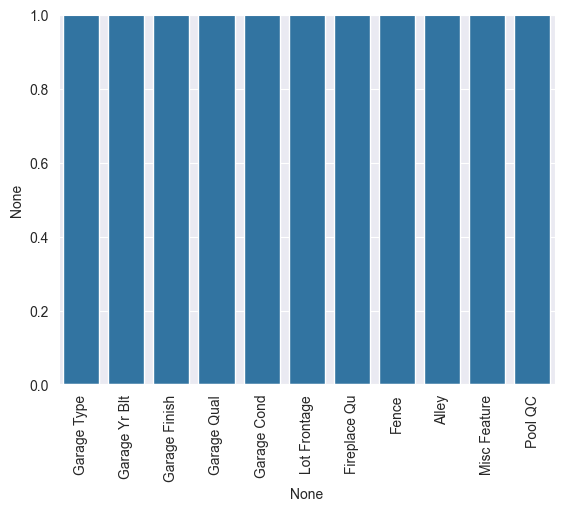

In [104]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [105]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [106]:
percent_nan = percent_missing(df)

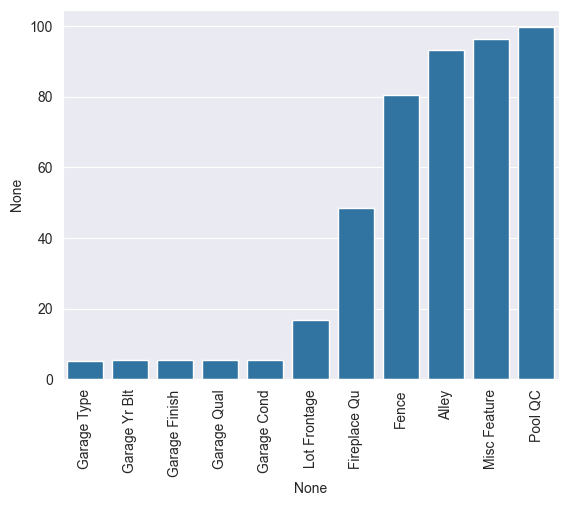

In [107]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# 112. Dealing with Missing Data : Part 3 - Fixing data based on Columns

In [108]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [109]:
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [110]:
percent_nan = percent_missing(df)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

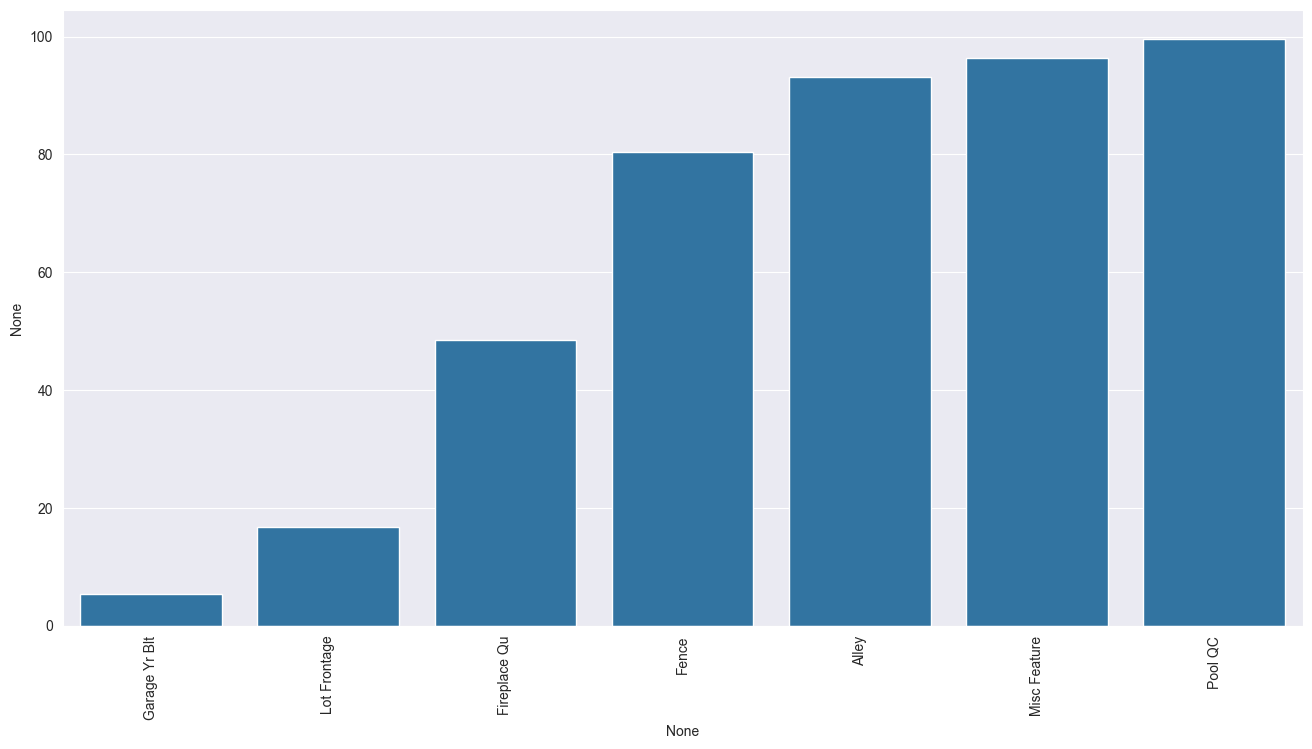

In [111]:
plt.figure(figsize=[16, 8])
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [112]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [113]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [116]:
percent_nan = percent_missing(df)

([0, 1], [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

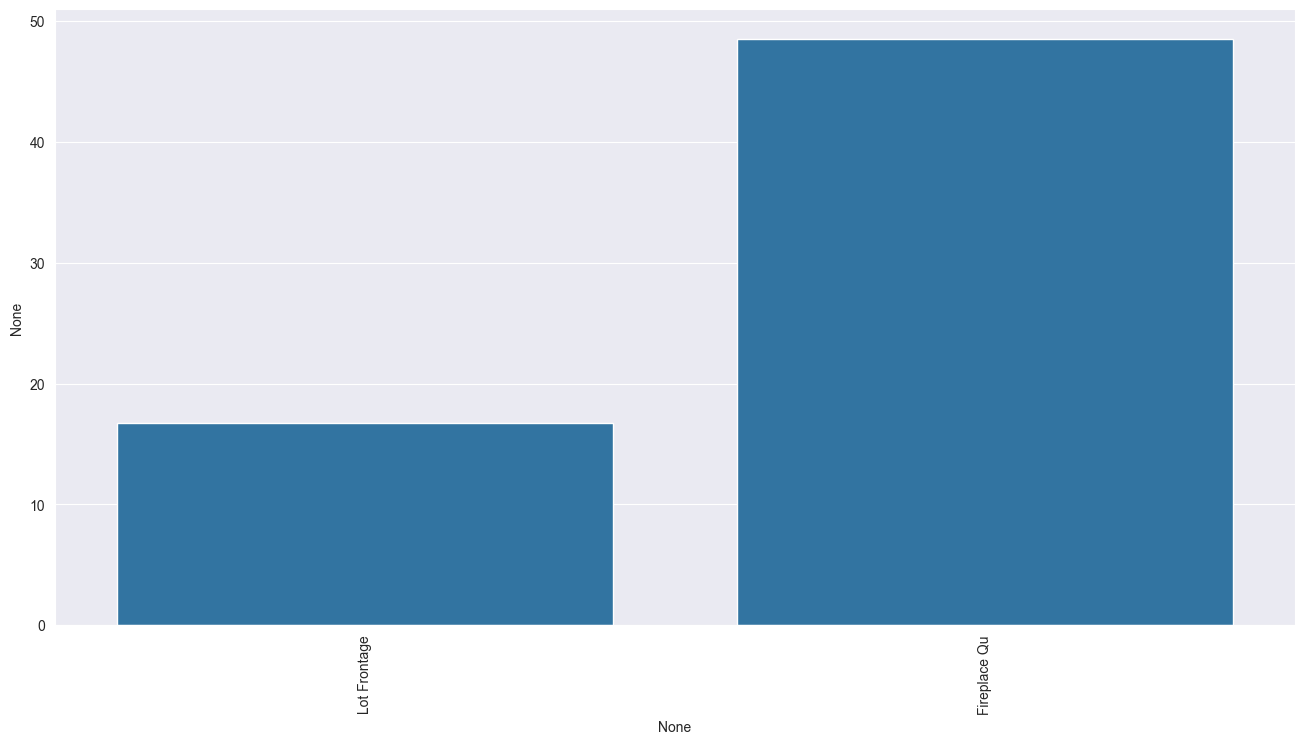

In [117]:
plt.figure(figsize=[16, 8])
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [119]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [120]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [121]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

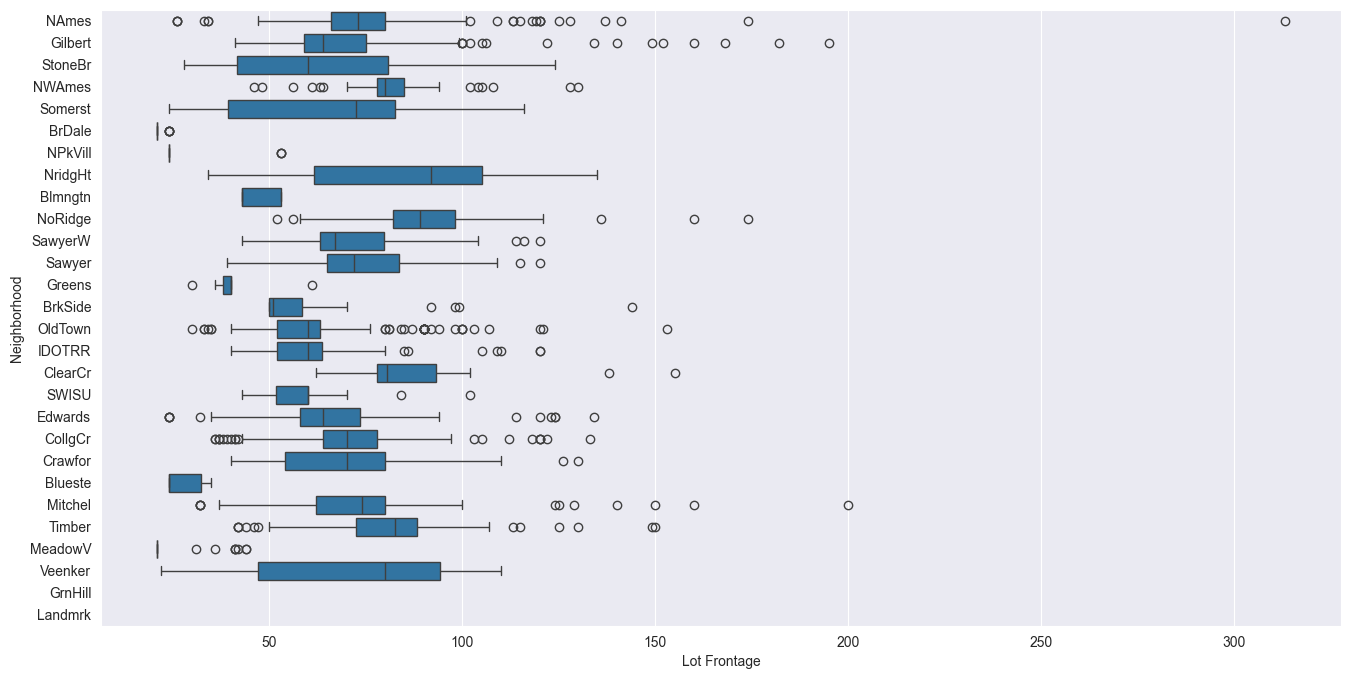

In [125]:
plt.figure(figsize=[16, 8])
sns.boxplot(x='Lot Frontage',y='Neighborhood', data=df, orient='h')

In [126]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [128]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [130]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [131]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [133]:
df.isnull().sum().sum() # No missing values

0

# 113. Dealing with Categorical Data - Encoding Options